In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('datasets/insurance (2).csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking outliers and treating them

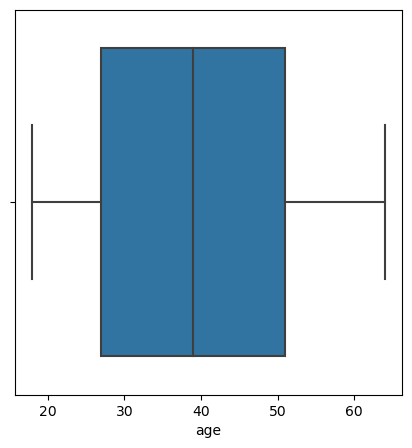

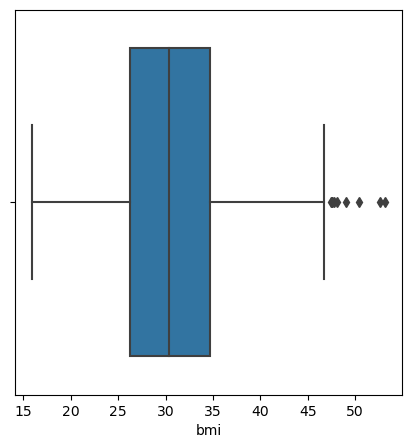

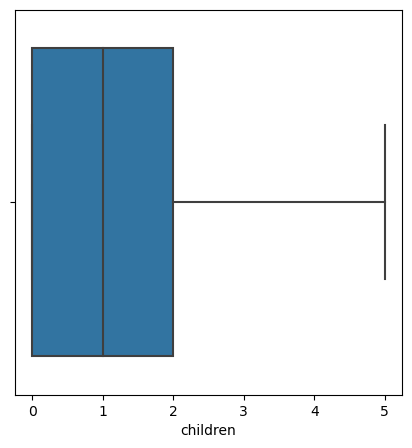

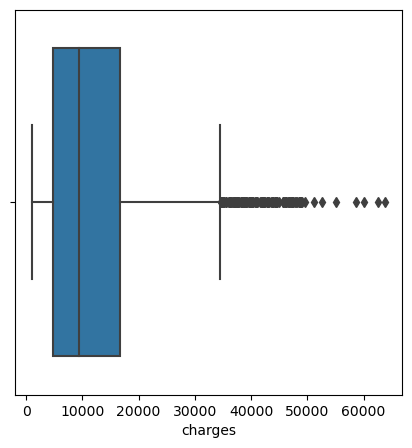

In [9]:
# visualizing outliers
for col in df.columns:
    if df[col].dtypes !='object': 
        plt.figure(figsize=(5,5))
        sns.boxplot(x=df[col],data=df)
    plt.show()

To be able to get a robust model, we have to remove the outliers

In [10]:
# remove outlier function
def remove_outliers(data):
    for col in data.columns:
        if data[col].dtypes !='object':
            Q1,Q3 =data[col].quantile([0.25,0.75])
            iqr = Q3-Q1
            lower_range = Q1-(1.5*iqr)
            upper_range = Q3 + (1.5*iqr)
            data[col] = np.where(data[col]<lower_range,lower_range,data[col])
            data[col] = np.where(data[col]>upper_range,upper_range,data[col])
        
    return data

In [11]:
df = remove_outliers(df)

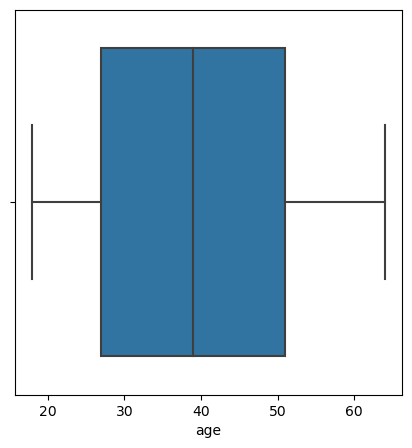

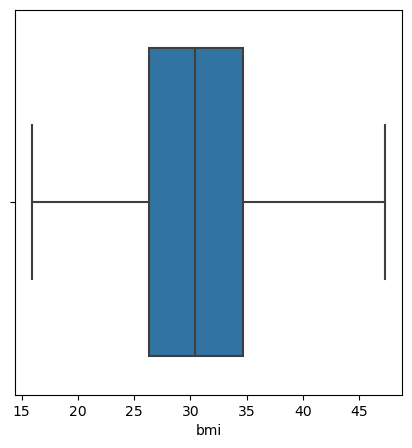

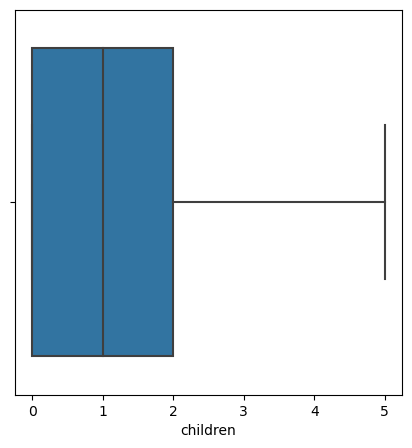

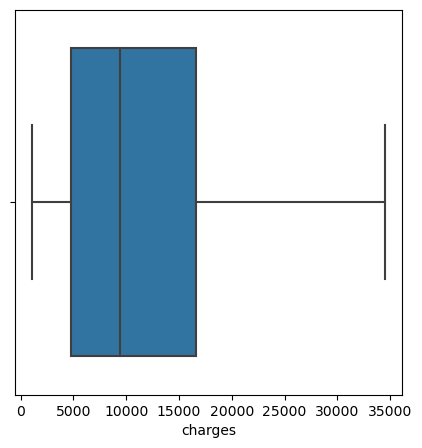

In [12]:
# visualizing outliers
for col in df.columns:
    if df[col].dtypes !='object': 
        plt.figure(figsize=(5,5))
        sns.boxplot(x=df[col],data=df)
    plt.show()

Now, the outliers are removed. Lets proceed to categorical encoding and standardization of data

#### Train Test split

In [13]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [14]:
X.head()

,age,sex,bmi,children,smoker,region
0,19.0,female,27.900,0.0,yes,southwest
1,18.0,male,33.770,1.0,no,southeast
2,28.0,male,33.000,3.0,no,southeast
3,33.0,male,22.705,0.0,no,northwest
4,32.0,male,28.880,0.0,no,northwest


In [15]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


### OneHotEncoding and Standardization

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_cols = []
cat_cols =[]
for col in X.columns:
    if X[col].dtypes !='object':
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [20]:
cat_col = X.select_dtypes(include=["object","bool"]).columns
num_col = X.select_dtypes(include=["float64","int64"]).columns

onehot = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

colTransformer = ColumnTransformer(transformers=[('onehot',onehot, cat_col),('scaler', scaler,num_col)],remainder='passthrough')

In [21]:
# apply transformers
x_train = colTransformer.fit_transform(x_train)
x_test = colTransformer.transform(x_test)

### model building

In [22]:
linR = LinearRegression()
linR.fit(x_train,y_train)

LinearRegression()

In [23]:
linR.score(x_test,y_test)

0.7837911443416787

In [24]:
# predict price
y_pred = linR.predict(x_test)

In [25]:
print(r2_score(y_test,y_pred))

0.7837911443416787


In [26]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4844.675427858026


In [27]:
import pickle

pickle.dump(linR, open('models/insurance_model.pkl','wb'))
pickle.dump(colTransformer,open('models/insurance_preprocessor.pkl','wb'))